<a href="https://colab.research.google.com/github/miketorii/Test/blob/master/reinforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

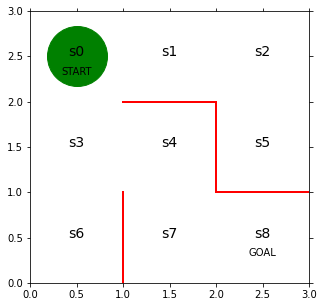

In [29]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red', linewidth=2)
plt.plot([1,2],[2,2],color='red', linewidth=2)
plt.plot([2,2],[2,1],color='red', linewidth=2)
plt.plot([2,3],[1,1],color='red', linewidth=2)

plt.text(0.5, 2.5, 's0', size=14, ha='center')
plt.text(1.5, 2.5, 's1', size=14, ha='center')
plt.text(2.5, 2.5, 's2', size=14, ha='center')
plt.text(0.5, 1.5, 's3', size=14, ha='center')
plt.text(1.5, 1.5, 's4', size=14, ha='center')
plt.text(2.5, 1.5, 's5', size=14, ha='center')
plt.text(0.5, 0.5, 's6', size=14, ha='center')
plt.text(1.5, 0.5, 's7', size=14, ha='center')
plt.text(2.5, 0.5, 's8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

In [30]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],
                    [np.nan, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                    [1, 1, 1, np.nan],
                    [np.nan, np.nan, 1, 1],
                    [1, np.nan, np.nan, np.nan],
                    [1, np.nan, np.nan, np.nan],
                    [1, 1, np.nan, np.nan]])

In [31]:
def simple_convert_into_pi_from_theta(theta):
  [m,n] = theta.shape
  pi = np.zeros((m,n))
  for i in range(0,m):
    pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
  
  pi = np.nan_to_num(pi)
  
  return pi

In [32]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [33]:
def get_next_s(pi, s):
  direction = ["up", "right", "down", "left"]

  next_direction = np.random.choice(direction, 1, p=pi[s, :])
  #print(next_direction)

  if next_direction == "up":
    s_next = s - 3
  elif next_direction == "right":
    s_next = s + 1
  elif next_direction == "down":
    s_next = s + 3
  elif next_direction == "left":
    s_next = s - 1

  return s_next

In [34]:
def goal_maze(pi):
  s = 0
  state_history = [0]

  while(1):
    next_s = get_next_s(pi, s)
    state_history.append(next_s)
    if next_s == 8:
      break
    else:
      s = next_s
      
  return state_history

In [35]:
state_history = goal_maze(pi_0)
print(state_history)

[0, 1, 0, 3, 6, 3, 0, 1, 2, 5, 2, 1, 0, 1, 2, 5, 2, 5, 2, 1, 2, 1, 0, 1, 0, 3, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 3, 6, 3, 0, 1, 0, 3, 6, 3, 4, 3, 6, 3, 0, 1, 0, 3, 4, 3, 4, 7, 8]


In [36]:
from matplotlib import animation
from IPython.display import HTML

def init():
  line.set_data([],[])
  return (line,)

def animate(i):
  state = state_history[i]
  x = (state % 3) + 0.5
  y = 2.5 - int(state /3)
  line.set_data(x, y)
  return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [37]:
def softmax_convert_into_pi_from_theta(theta):
  beta = 1.0
  [m,n] = theta.shape
  pi = np.zeros((m,n))

  exp_theta = np.exp( beta * theta )

  for i in range(0,m):
    pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
  
  pi = np.nan_to_num(pi)
  
  return pi

In [38]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [39]:
def get_action_and_next_s(pi, s):
  direction = ["up", "right", "down", "left"]

  next_direction = np.random.choice(direction, 1, p=pi[s, :])
  #print(next_direction)

  if next_direction == "up":
    action = 0
    s_next = s - 3
  elif next_direction == "right":
    action = 1
    s_next = s + 1
  elif next_direction == "down":
    action = 2
    s_next = s + 3
  elif next_direction == "left":
    action = 3
    s_next = s - 1

  return [action, s_next]

In [40]:
def goal_maze_ret_s_a(pi):
  s = 0
  s_a_history = [[0, np.nan]]

  while(1):
    action, next_s = get_action_and_next_s(pi, s)
    s_a_history[-1][1] = action

    s_a_history.append([next_s, np.nan])
    if next_s == 8:
      break
    else:
      s = next_s
      
  return s_a_history

In [41]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)

[[0, 2], [3, 1], [4, 3], [3, 0], [0, 2], [3, 0], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]


In [42]:
def update_theta(theta, pi, s_a_history):
  eta = 0.1
  T = len(s_a_history) - 1

  [m,n] = theta.shape
  delta_theta = theta.copy()

 # print(m)
 # print(n)

  for i in range(0, m):
    for j in range(0, n):
      if not( np.isnan(theta[i, j]) ):
        SA_i = [SA for SA in s_a_history if SA[0] == i]
        SA_ij = [SA for SA in s_a_history if SA == [i, j] ]
  #      print('--SA_i--')
  #      print(SA_i)
  #      print('--SA_ij--')
  #      print(SA_ij)
        N_i = len(SA_i)
        N_ij = len(SA_ij)
        delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
        
  new_theta = theta + eta * delta_theta

  return new_theta

In [43]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
print(new_theta)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[       nan 1.01022727 1.02159091        nan]
 [       nan 1.01477273        nan 1.00795455]
 [       nan        nan 1.01136364 1.01590909]
 [1.01969697 1.01287879 1.01742424        nan]
 [       nan        nan 1.01477273 1.00795455]
 [1.00909091        nan        nan        nan]
 [1.01818182        nan        nan        nan]
 [1.01136364 1.00681818        nan        nan]]
[[0.         0.49715912 0.50284088 0.        ]
 [0.         0.50170454 0.         0.49829546]
 [0.         0.         0.49886364 0.50113636]
 [0.33434362 0.33207176 0.33358461 0.        ]
 [0.         0.         0.50170454 0.49829546]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50113636 0.49886364 0.         0.        ]]


In [44]:
stop_epsilon = 10**-8

theta = theta_0
pi = pi_0
is_continue = True
count = 1

while is_continue:
  s_a_history = goal_maze_ret_s_a(pi)
  new_theta = update_theta(theta, pi, s_a_history)
  new_pi = softmax_convert_into_pi_from_theta(new_theta)

  print(np.sum(np.abs(new_pi - pi)))
  print(len(s_a_history)-1)

  if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
    is_continue = False
  else:
    theta = new_theta
    pi = new_pi

0.021035258162234338
14
0.008980549813803307
30
0.010605286908174194
16
0.006767695910297966
86
0.016330299166757656
58
0.017717995901394445
18
0.013026841242554488
20
0.005341482034592504
66
0.0038199469590909363
62
0.013719984044508027
14
0.0065810943946054135
132
0.04092578904894778
6
0.009113640757278052
58
0.03237345246793083
10
0.013504762491788891
56
0.025776626575193584
32
0.011417064375645047
16
0.0500631114331474
4
0.011643751088361909
36
0.02389639841712682
24
0.015209796058435754
18
0.013351270813396598
58
0.021103288226934525
12
0.004381611591231682
92
0.009118566394296312
56
0.011532063955493888
44
0.011226931893952186
80
0.009435494528523825
174
0.01447320685198078
66
0.010534309789863971
64
0.019944198634486265
18
0.0071004601678986146
78
0.029136989703608507
10
0.0173237828575466
16
0.01793095146931678
24
0.009289678547723501
46
0.03505274778566886
6
0.005837103169964775
38
0.015189520252226973
36
0.05185561059500915
4
0.030314896420461368
10
0.03626341227865221
6
0.01

In [45]:
np.set_printoptions(precision=3, suppress=True)
print(pi)


[[0.    0.    1.    0.   ]
 [0.    0.436 0.    0.564]
 [0.    0.    0.498 0.502]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]]


In [48]:
from matplotlib import animation
from IPython.display import HTML

def init():
  line.set_data([],[])
  return (line,)

def animate(i):
  state = s_a_history[i][0]
  x = (state % 3) + 0.5
  y = 2.5 - int(state /3)
  line.set_data(x, y)
  return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())